In [2]:
import pandas as pd 
import numpy as np

In [3]:
df = pd.read_csv("./archivos/covid_19_data.csv")
df

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
3390,3391,03/04/2020,NaN,Ukraine,2020-03-03T15:33:02,1.0,0.0,0.0
3391,3392,03/04/2020,From Diamond Princess,Australia,2020-02-29T02:03:10,0.0,0.0,0.0
3392,3393,03/04/2020,"Lackland, TX (From Diamond Princess)",US,2020-02-24T23:33:02,0.0,0.0,0.0
3393,3394,03/04/2020,"Omaha, NE (From Diamond Princess)",US,2020-02-24T23:33:02,0.0,0.0,0.0


In [29]:
df["ObservationDate"] = pd.to_datetime(df["ObservationDate"])
df.dtypes

SNo                         int64
ObservationDate    datetime64[ns]
Province/State             object
Country/Region             object
Last Update                object
Confirmed                 float64
Deaths                    float64
Recovered                 float64
dtype: object

In [23]:
df.groupby("Country/Region")["Confirmed"].max().sort_values(ascending=False)

Country/Region
Mainland China    67332.0
South Korea        5621.0
Italy              3089.0
Iran               2922.0
Others              706.0
                   ...   
Morocco               1.0
Nepal                 1.0
Nigeria               1.0
Latvia                1.0
Colombia              0.0
Name: Confirmed, Length: 90, dtype: float64

In [31]:
df_time = df.groupby(["Country/Region",
            pd.Grouper(key="ObservationDate", freq = "1D")]).sum()
df_time

SNo  Confirmed  Deaths  Recovered
Country/Region ObservationDate                                    
 Azerbaijan    2020-02-28       2664        1.0     0.0        0.0
Afghanistan    2020-02-24       2259        1.0     0.0        0.0
               2020-02-25       2352        1.0     0.0        0.0
               2020-02-26       2453        1.0     0.0        0.0
               2020-02-27       2557        1.0     0.0        0.0
...                              ...        ...     ...        ...
Vietnam        2020-02-29       2749       16.0     0.0       16.0
               2020-03-01       2870       16.0     0.0       16.0
               2020-03-02       2998       16.0     0.0       16.0
               2020-03-03       3141       16.0     0.0       16.0
               2020-03-04       3297       16.0     0.0       16.0

[1462 rows x 4 columns]

In [37]:
df_china = df_time.loc["Mainland China",:]
df_china.head(10)

,SNo,Confirmed,Deaths,Recovered
ObservationDate,,,,
2020-01-22,535,547.0,17.0,28.0
2020-01-23,1713,639.0,18.0,30.0
2020-01-24,3004,916.0,26.0,36.0
2020-01-25,4224,1399.0,42.0,39.0
2020-01-26,5548,2062.0,56.0,49.0
2020-01-27,6953,2863.0,82.0,58.0
2020-01-28,8478,5494.0,131.0,101.0
2020-01-29,10040,6070.0,133.0,120.0
2020-01-30,12064,8124.0,171.0,135.0


<AxesSubplot:title={'center':'COVID-19'}, xlabel='ObservationDate'>

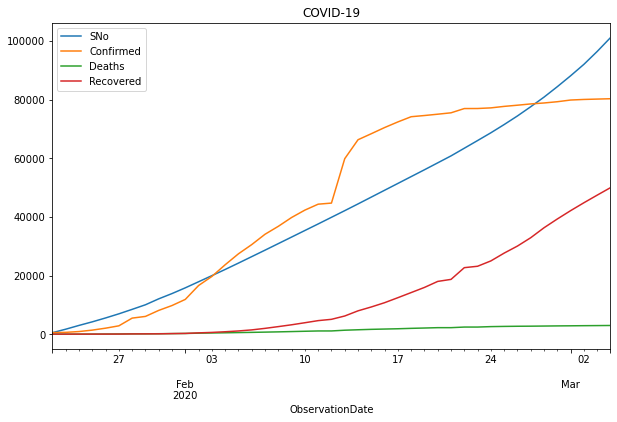

In [43]:
df_china.plot(figsize = (10,6), title = ("COVID-19"))